In [2]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def zp_model(tp, ha, Tc):
    """Model equation: zp = ha * ln(tp / Tc)"""
    return ha * np.log(tp / Tc)

def fit_ha_Tc(exposure_times, measured_zp_means):
    """
    Fit the zp = ha * ln(tp / Tc) model to the data.
    
    Parameters:
    - exposure_times: list or np.array of exposure times (tp)
    - measured_zp_means: list or np.array of mean measured cured depths (zp)
    
    Returns:
    - ha: Penetration depth
    - Tc: Critical exposure time
    """
    # Initial guesses for ha and Tc
    initial_guess = [40.0, 0.3]  # Just example guesses
    # Curve fitting
    popt, _ = curve_fit(zp_model, exposure_times, measured_zp_means, p0=initial_guess)
    ha, Tc = popt
    return ha, Tc


def plot_fit_with_error_bars(exposure_times, measured_zp_data, ha, Tc):
    # Calculate means and standard deviations for each exposure time
    zp_means = np.mean(measured_zp_data, axis=1)
    zp_stds = np.std(measured_zp_data, axis=1)
    
    tp_fine = np.linspace(min(exposure_times), max(exposure_times), 200)
    zp_fit = zp_model(tp_fine, ha, Tc)

    plt.figure(figsize=(10, 6))
    # Plot individual measurements as scatter points
    for i, exp_time in enumerate(exposure_times):
        plt.scatter([exp_time] * measured_zp_data.shape[1], measured_zp_data[i], 
                   alpha=0.3, color='blue', label='Individual measurements' if i == 0 else '')
    
    # Plot means with error bars
    plt.errorbar(exposure_times, zp_means, yerr=zp_stds, fmt='o', 
                color='blue', ecolor='black', capsize=5, capthick=1, 
                label='Mean ± std', zorder=5)
    
    # Plot fitted curve
    plt.plot(tp_fine, zp_fit, '-', 
            label=f'Fitted curve\n$z_p = {ha:.2f} \\cdot \\ln(t_p / {Tc:.2f})$', 
            color='red')
    
    plt.xlabel("Exposure Time $t_p$ (s)")
    plt.ylabel("Polymerized Thickness $z_p$ (µm)")
    plt.title("Fit of $z_p = h_a \\ln{\\frac{t_p}{T_c}}$")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def load_measured_zp_data_from_csv(path):
    with open(path, "r") as f:
        csv_data = f.read()
    from io import StringIO
    df = pd.read_csv(StringIO(csv_data))
    df['Image Number'] = df['Image'].str.split('_').str[0].astype(int)
    df_sorted = df.sort_values(by='Image Number', ascending=False)
    grouped = df_sorted.groupby('Image Number')['Length µm'].apply(list).tolist()
    measured_zp_data = np.array(grouped)
    return measured_zp_data


# Results

### Elegoo ABS-like clear

Fitted ha (Elegoo): 135.58 µm
Fitted Tc (Elegoo): 3.524 s


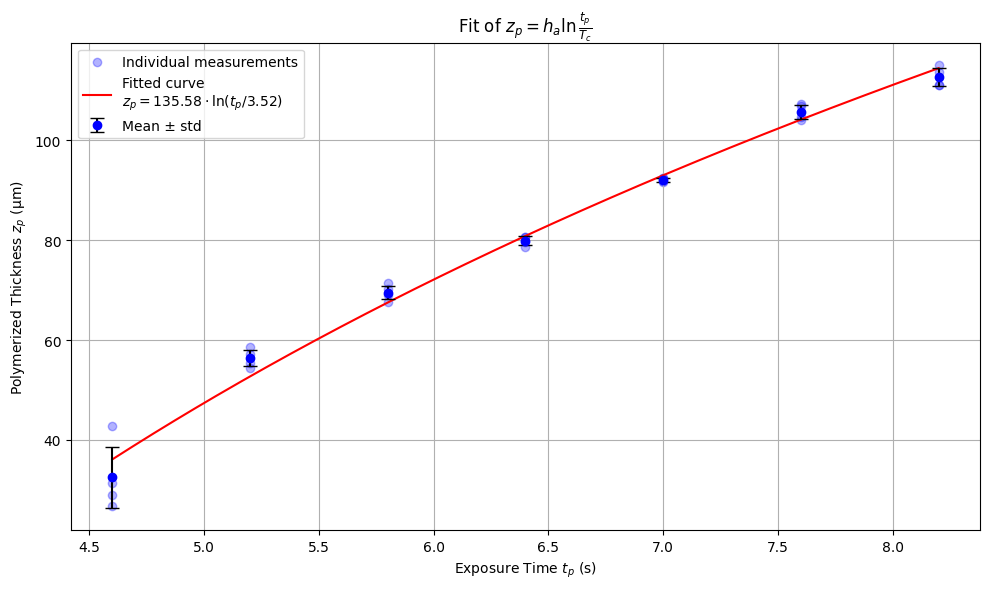

In [ ]:
elegoo_abs_csv_path = "./qupath/exp_calibration/elegoo_abs_4.0-8.2s/measurements.csv"
elegoo_abs_measured_zp_data = load_measured_zp_data_from_csv(elegoo_abs_csv_path)
elegoo_abs_exposure_times = np.array([8.2, 7.6, 7.0, 6.4, 5.8, 5.2, 4.6]) # sample 1-7 worked

elegoo_abs_measured_zp_means = np.mean(elegoo_abs_measured_zp_data, axis=1)
ha, Tc = fit_ha_Tc(elegoo_abs_exposure_times, elegoo_abs_measured_zp_means)
print(f"Fitted ha (Elegoo ABS-like): {ha:.2f} µm")
print(f"Fitted Tc (Elegoo ABS-like): {Tc:.3f} s")

plot_fit_with_error_bars(elegoo_abs_exposure_times, elegoo_abs_measured_zp_data, ha, Tc)

In [28]:
# anycubic standard clear
et_standard_clear = np.array([1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])  # 7 exposure times
data_standard_clear = np.array([
    [32.72, 35.12, 36.32],    # measurements for 1.2s
    [46.16, 45.53, 42.52],    # measurements for 1.4s
    [54.49, 53.54, 55.39],    # measurements for 1.6s
    [65.99, 65.05, 61.68],    # measurements for 1.8s
    [74.24, 75.45, 74.38],    # measurements for 2.0s
    [82.13, 83.04, 82.04],    # measurements for 2.2s
    [89.45, 97.62, 93.27]     # measurements for 2.4s
])

# Siraya Tech Sculpt Gray
et_sculpt_gray = np.array([2.1, 2.5, 2.8, 3.1, 3.4, 3.7, 4.0])  # 7 exposure times
measured_zp_data_sculpt_gray = np.array([
    [30.52, 35.63, 39.40],    # measurements for 2.1s
    [45.18, 52.93, 48.78],    # measurements for 2.4s
    [64.69, 74.04, 68.00],    # measurements for 3.0s
    [73.61, 77.93, 79.91],    # measurements for 2.7s
    [78.09, 77.54, 82.03],    # measurements for 3.3s
    [92.46, 96.07, 93.76],    # measurements for 3.7s
    [108.36, 111.28, 112.03]     # measurements for 4.0s
])

# Phrozen Speed Gray
et_speed_gray = np.array([1.2, 1.4, 1.6, 1.8, 2.0, 2.2])  # 6 exposure times
measured_zp_data_speed_gray = np.array([
    [43.46, 47.66, 49.38],    # measurements for 1.2s
    [73.83, 72.07, 73.17],    # measurements for 1.4s
    [80.69, 83.79, 84.06],    # measurements for 1.6s
    [86.88, 89.01, 86.80],    # measurements for 1.8s
    [101.12, 100.79, 99.44],    # measurements for 2.0s
    [124.83, 118.36, 117.92]     # measurements for 2.2s
])

### Anycubic Standad Clear

Fitted ha (Anycubic Standard Clear): 81.72 µm
Fitted Tc (Anycubic Standard Clear): 0.756 s


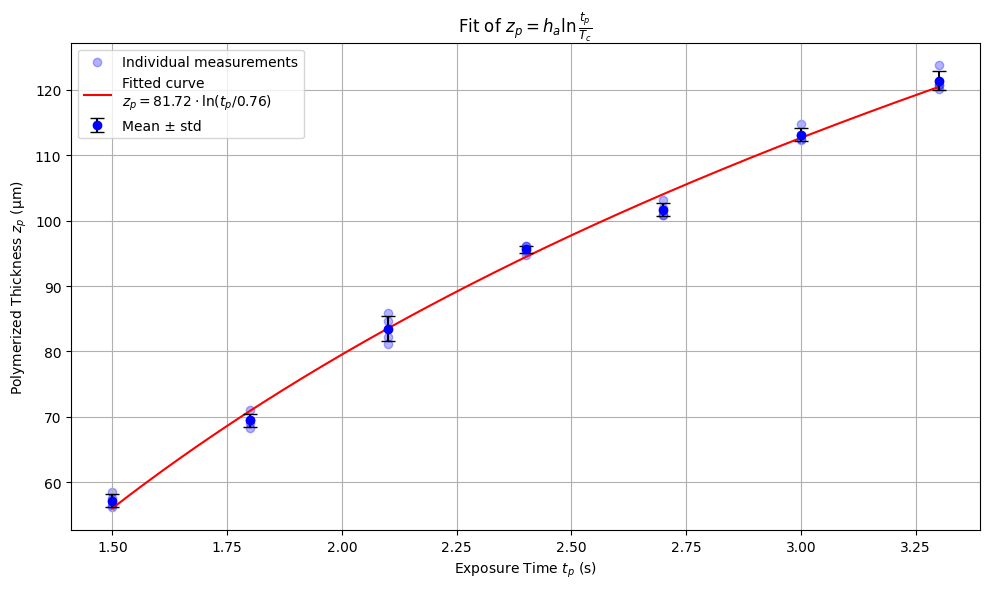

In [23]:
anycubic_stadard_clear_csv_path = "./qupath/exp_calibration/anycubic_standard_clear_1.2-3.3s/measurements.csv"
anycubic_stadard_clear_measured_zp_data = load_measured_zp_data_from_csv(anycubic_stadard_clear_csv_path)
anycubic_stadard_clear_exposure_times = np.array([3.3, 3.0, 2.7, 2.4, 2.1, 1.8, 1.5]) # sample 1-7 worked

anycubic_stadard_clear_measured_zp_means = np.mean(anycubic_stadard_clear_measured_zp_data, axis=1)
ha, Tc = fit_ha_Tc(anycubic_stadard_clear_exposure_times, anycubic_stadard_clear_measured_zp_means)
print(f"Fitted ha (Anycubic Standard Clear): {ha:.2f} µm")
print(f"Fitted Tc (Anycubic Standard Clear): {Tc:.3f} s")

plot_fit_with_error_bars(anycubic_stadard_clear_exposure_times, anycubic_stadard_clear_measured_zp_data, ha, Tc)

Fitted ha (Siraya Sculpt Clear): 119.69 µm
Fitted Tc (Siraya Sculpt Clear): 1.115 s


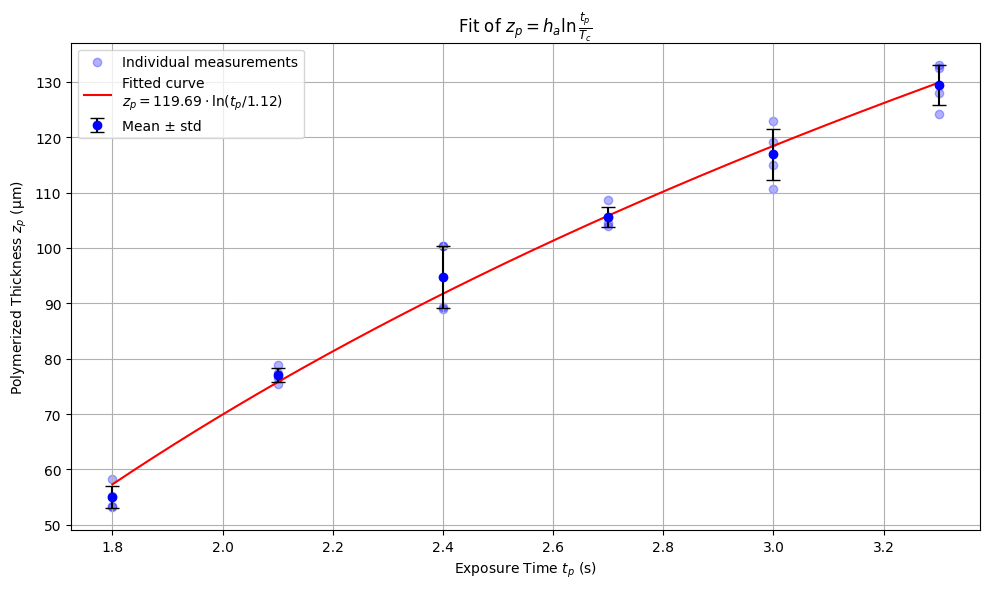

In [25]:
siraya_sculpt_clear_csv_path = "./qupath/exp_calibration/siraya_sculpt_clear_1.2-3.3s/measurements.csv"
siraya_sculpt_clear_measured_zp_data = load_measured_zp_data_from_csv(siraya_sculpt_clear_csv_path)
siraya_sculpt_clear_exposure_times = np.array([3.3, 3.0, 2.7, 2.4, 2.1, 1.8]) # samples 1-6 worked

siraya_sculpt_clear_measured_zp_means = np.mean(siraya_sculpt_clear_measured_zp_data, axis=1)
ha, Tc = fit_ha_Tc(siraya_sculpt_clear_exposure_times, siraya_sculpt_clear_measured_zp_means)
print(f"Fitted ha (Siraya Sculpt Clear): {ha:.2f} µm")
print(f"Fitted Tc (Siraya Sculpt Clear): {Tc:.3f} s")

plot_fit_with_error_bars(siraya_sculpt_clear_exposure_times, siraya_sculpt_clear_measured_zp_data, ha, Tc)

Fitted ha (Frozen Speed Gray): 122.78 µm
Fitted Tc (Frozen Speed Gray): 0.667 s


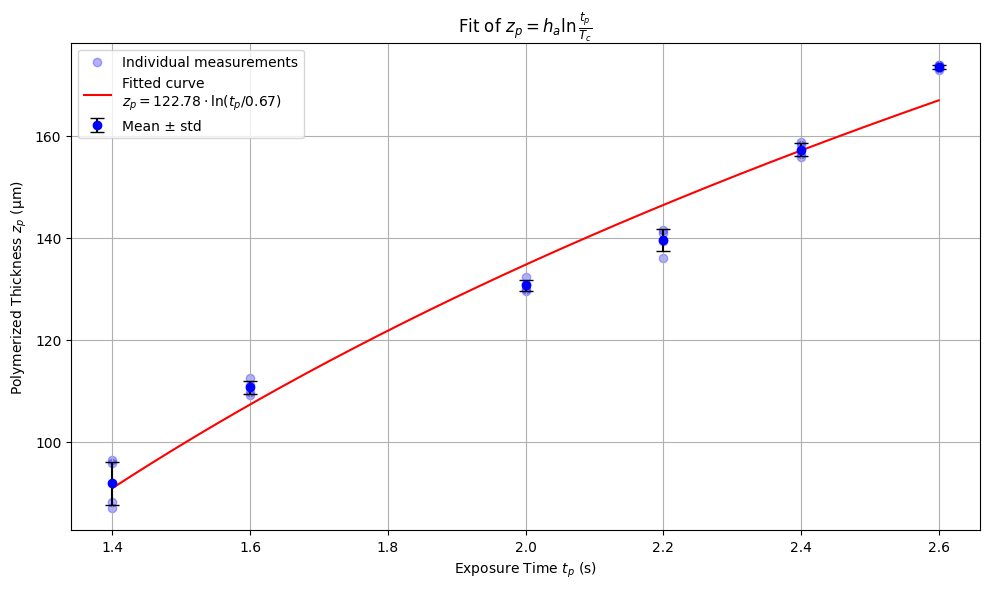

In [ ]:
frozen_speed_gray_csv_path = "./qupath/exp_calibration/frozen_speed_gray_1.2-2.6s/measurements.csv"
frozen_speed_gray_measured_zp_data = load_measured_zp_data_from_csv(frozen_speed_gray_csv_path)
frozen_speed_gray_exposure_times = np.array([2.6, 2.4, 2.2, 2.0, 1.6, 1.4]) # samples 1-4, 6, 7 worked

frozen_speed_gray_measured_zp_means = np.mean(frozen_speed_gray_measured_zp_data, axis=1)
ha, Tc = fit_ha_Tc(frozen_speed_gray_exposure_times, frozen_speed_gray_measured_zp_means)
print(f"Fitted ha (Frozen Speed Gray): {ha:.2f} µm")
print(f"Fitted Tc (Frozen Speed Gray): {Tc:.3f} s")

plot_fit_with_error_bars(frozen_speed_gray_exposure_times, frozen_speed_gray_measured_zp_data, ha, Tc)